In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(filepath_or_buffer='AAPL.dat',index_col='Date', parse_dates=True)

In [6]:
df.tail()
df.head()
df.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,4526.000000,4526.000000,4526.000000,4526.000000,4.526000e+03,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4526.000000,4.526000e+03
mean,169.417996,171.262306,167.359667,169.347781,2.254360e+07,0.006732,1.001768,41.531403,41.913109,41.115679,41.525414,1.242501e+08
std,168.856672,170.209837,167.227741,168.740175,1.835503e+07,0.126783,0.091622,45.337628,45.664120,44.989681,45.340520,9.978758e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05,0.000000,1.000000,0.834698,0.847549,0.817349,0.843051,9.835000e+06
25%,44.930000,46.048250,44.205000,45.740000,8.402175e+06,0.000000,1.000000,3.534294,3.653732,3.479113,3.549073,5.742415e+07
50%,110.805000,112.425000,109.475000,111.040000,1.824290e+07,0.000000,1.000000,21.070503,21.412992,20.703595,21.067290,9.756670e+07
75%,199.397500,201.530000,196.827500,198.790000,3.086265e+07,0.000000,1.000000,72.402203,72.997218,71.649190,72.352263,1.611342e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,175.110000,177.200000,174.860000,176.420000,1.855410e+09


In [8]:
df2 = df.sort_values(by='Date',ascending=True)
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


In [14]:
df2['30d mavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] + (df2['30d std'] * 2)

<Axes: xlabel='Date'>

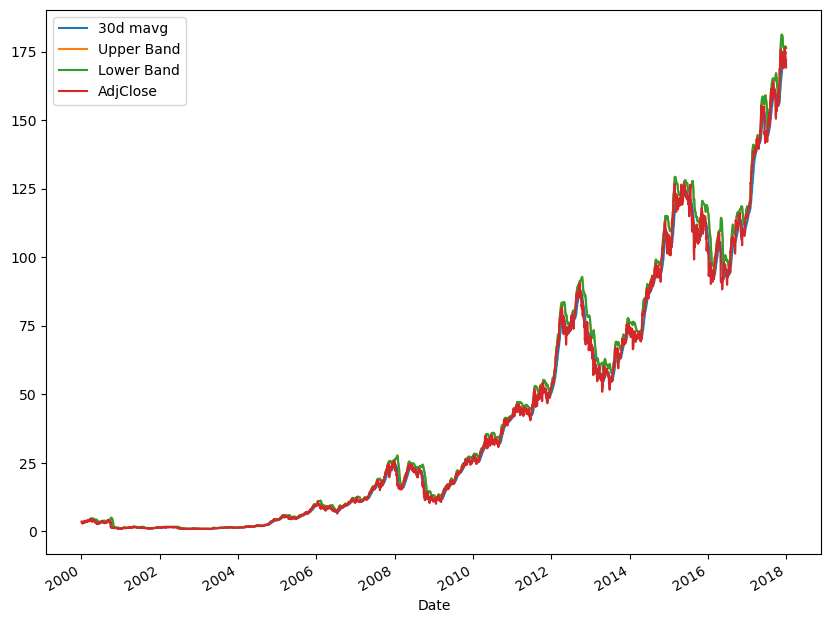

In [18]:
cols = ['30d mavg','Upper Band', 'Lower Band','AdjClose']
df2[cols].plot(figsize=(10,8))

<Axes: xlabel='Date'>

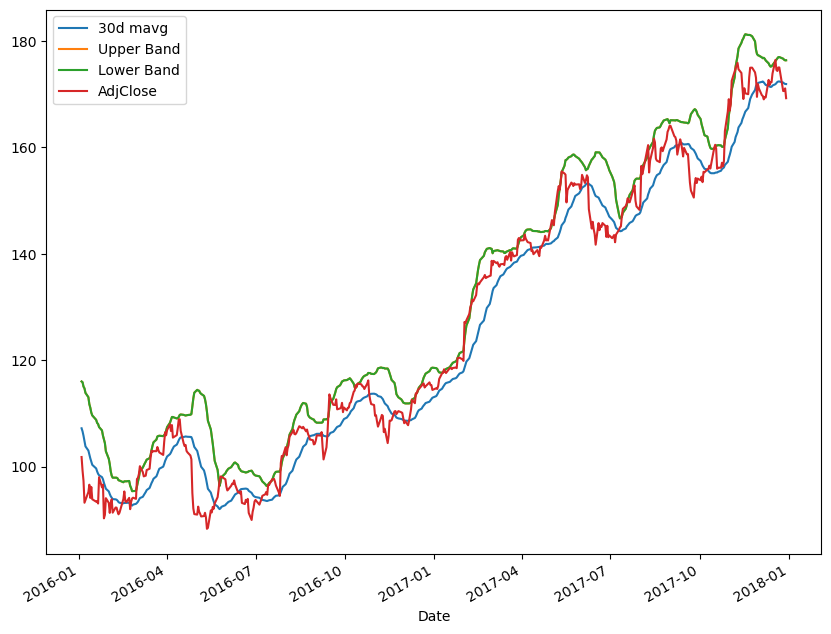

In [23]:
df2['2016':][cols].plot(figsize=(10,8))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

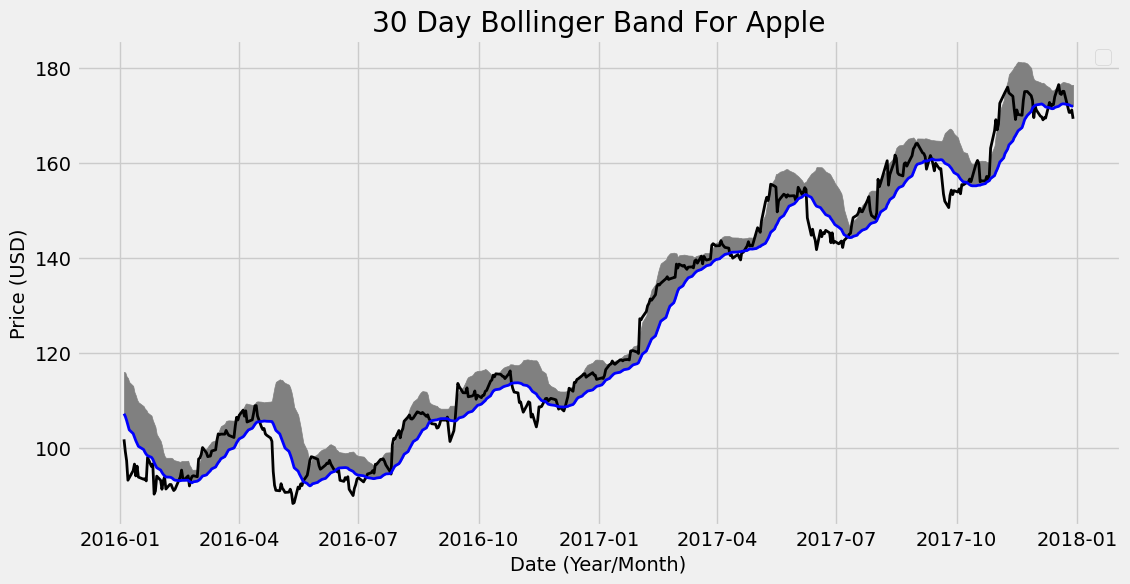

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis = df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis, df2['2016':]['Upper Band'],df2['2016':]['30d mavg'], color="grey")

ax.plot(x_axis,df2['2016':]['AdjClose'], color="black", lw=2)
ax.plot(x_axis,df2['2016':]['30d mavg'], color="blue", lw=2)

ax.set_title('30 Day Bollinger Band For Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.plot()

In [ ]:
 def plotBollBand(file, securityName, attribute = 'AdjClose', window=21, start=None, end=None):
        df = pd.read_csv(filepath_or_buffer=file,index_col='Date', parse_dates=True)
        df2 = df.sort_values(by='Date',ascending=True)
        mavgCol = str(window)+'d mvag'
        stdCol = str(window) +'d std'
        
        df[mavgCol] = df[attribute].rolling(window=window).mean()
        df[stdCol] = df[attribute].rolling(window=window).std()
        df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
        df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
        
        plt.style.use('fivethirtyeight')
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        
        x_axis = df[start:end]